<h1>Challenge 4: The Matrix Chain Multiplication</h1>

Solve a problem to find the minimum number of primitive multiplications required for a matrix chain multiplication.

> **Problem statement**

Remember how matrix multiplication works. Given two matrices AA and BB of dimensions (n \times m)(n×m) and (m \times l)(m×l), the resulting matrix we get is ABAB whose dimensions are (n \times l)(n×l). We’ve shown how matrix multiplication occurs in the example below.

You can see in the above visualization the number of primitive multiplications that take place during the evaluation of ABAB. To multiply two matrices of dimensions (n×m) and (m×l), the total number of primitive multiplications required are n×m×l.

One thing you might remember from matrices is that AB≠BA, meaning that the matrix multiplication is non-commutative. But matrix multiplication satisfies associative law, i.e., (AB)C = A(BC). This means that the order in which chain multiplication of more than two matrices takes place does not affect the correctness of the result. One thing it does affect, however, is the number of primitive multiplications that we have to do.
Now that you have grasped the basics of matrix multiplications, let’s look at the problem. You are given a chain of matrices to be multiplied. You have to find the least number of primitive multiplications possible to evaluate the result.

> **Input**

Your algorithm will take as input dims, a list denoting the dimensions of the matrices to be multiplied given. Since columns of the first matrix and rows of the second matrix are the same, we have not repeated this information in the list dims. So now the dimensions of the first matrix would be (dims[0]×dims[1]) and the second matrix would have dimensions of (dims[1]×dims[2]). Similarly, the dimensions of the third matrix would be (dims[2]×dims[3]).

dims = [3,3,2,1]

> **Output**

Your algorithm would return the least number of primitive multiplications required to multiply the chain of matrices whose dimensions are given to you in dims.

MinMultplications([3,3,2,1]) = 15

> **Coding challenge**

First, write down a few examples on a piece of paper and try to solve them manually. Once you have done that, write a brute force algorithm and then think about how you can make it more efficient

> **Solution #1: Simple recursion**




In [1]:
import numpy as np
def minMultiplications(dims):
    if len(dims) <= 2:
        return 0
    minimum = np.inf
    for i in range(1,len(dims)-1):
        minimum = min(minimum, minMultiplications(dims[0:i+1]) + minMultiplications(dims[i:]) +
                    dims[0] * dims[-1] * dims[i])
    return minimum

print(minMultiplications([3, 3, 2, 1, 2]))

21


> **Solution #2: Top-down dynamic programming**




Let’s see how this problem satisfies both conditions of dynamic programming.

**Optimal substructure**

For solving this problem for nn matrices:

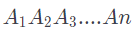

If we know the optimal solutions to following subproblems, we just need to take the minimum of the results:

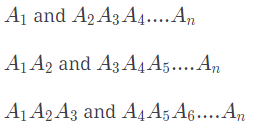

and so on.

Thus, this problem obeys the property of optimal substructure.

**Overlapping subproblem**

You can see in the above example of only four matrices we have many repeating subproblems. This would increase exponentially as we increase the number of matrices.

In [2]:
import numpy as np

def minRecursive(dims, i, j, memo):
    if j-i <= 2:
        return 0
    if (i,j) in memo:
        return memo[(i,j)]
    minimum = np.inf
    for k in range(i+1, j-1):
        minimum = min(minimum, minRecursive(dims, i, k+1, memo) + minRecursive(dims, k, j, memo) +
                    dims[i]*dims[j-1]*dims[k])
    memo[(i,j)] = minimum
    return minimum

def minMultiplications(dims):
    memo = {}
    return minRecursive(dims, 0, len(dims), memo)

print(minMultiplications([3, 3, 2, 1, 2]))

21


>**Solution #3: Bottom-up dynamic programming**




In [3]:
import numpy as np

def minMultiplications(dims):
    
    dp = [[0 for _ in range(len(dims))] for _ in range(len(dims))]

    for l in range(2,len(dims)):
        for i in range(1,len(dims)-l+1):
            j = i+l-1
            dp[i][j] = np.inf
            for k in range(i, j):
                temp = dp[i][k]+ dp[k+1][j] + dims[i-1]*dims[k]*dims[j]
                if temp < dp[i][j]:
                    dp[i][j] = temp
    return dp[1][-1]
print(minMultiplications([3, 3, 2, 1, 2]))

21
